In [1]:
# コイン投げ問題

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
plt.style.use('seaborn-darkgrid')

np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/traceplot.py:214: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta'}
  invalid_var_names, all_var_names


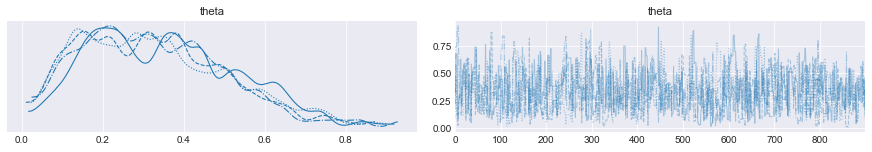

In [2]:
import pymc3 as pm

with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, start=start)
    burnin = 100
    chain = trace[burnin:]
    pm.traceplot(chain, lines={'theta':theta_real})

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/traceplot.py:214: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta'}
  invalid_var_names, all_var_names


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

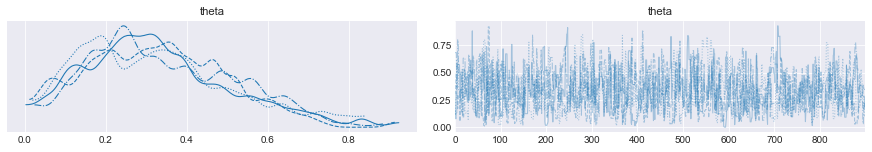

In [6]:
with our_first_model:
    step = pm.Metropolis()
    multi_trace = pm.sample(1000, step=step)
    

burnin = 100
multi_chain = multi_trace[burnin:]
pm.traceplot(multi_chain, lines={'theta':theta_real})


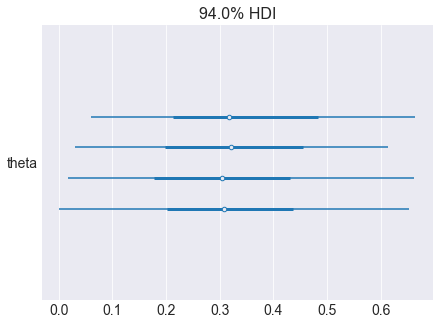

In [10]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    pm.forestplot(multi_chain)

In [11]:
#事後分布の要約
pm.summary(multi_chain)

/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.331,0.179,0.029,0.653,0.007,0.005,724.0,724.0,715.0,841.0,1.0


#### 自己相関

理想的なサンプルには自己相関(autocorrelation)がありません。すなわち、ある点での数値は、別の点での数値と独立しています。実際のところ、MCMC法によって生成されるサンプル、特にメトロポリスーヘイスティングスによって生成されるサンプルは、自己相関がある可能性があります。いくつかのモデルは、あるパラメータが他のパラメータに依存していることによって相関を持ち、これによりサンプルに自己相関が生じます。

/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'theta\n0'}>,
       <AxesSubplot:title={'center':'theta\n1'}>,
       <AxesSubplot:title={'center':'theta\n2'}>,
       <AxesSubplot:title={'center':'theta\n3'}>], dtype=object)

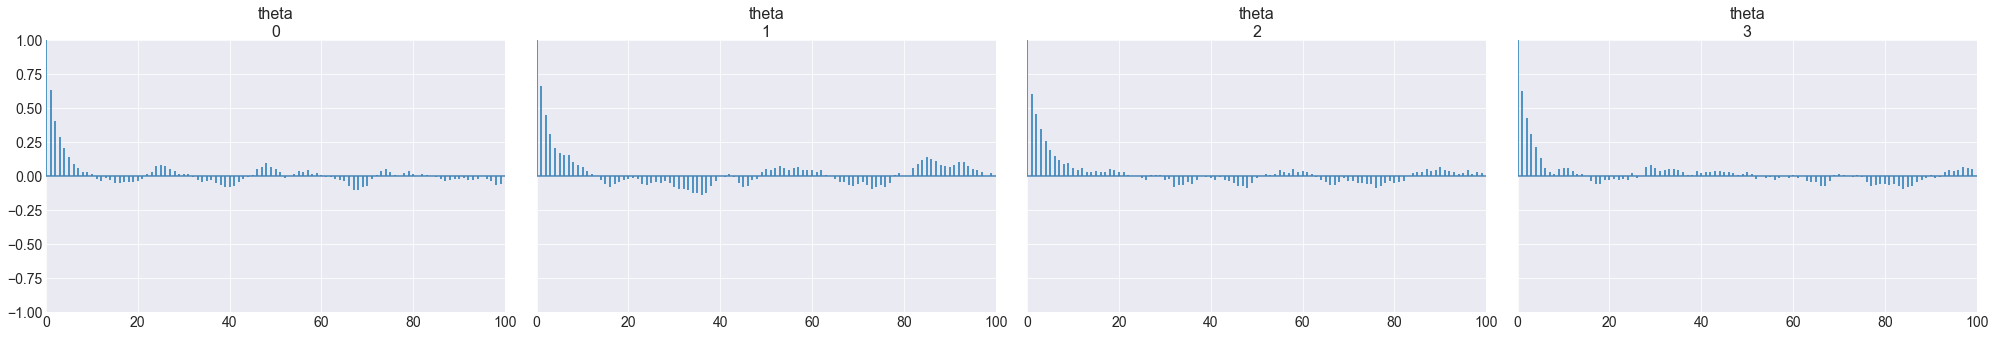

In [12]:
pm.autocorrplot(chain)

#### 有効サイズ

自己相関があるサンプルは、自己相関がない同サイズのサンプルと比較すると、より少ない情報しか持っていません。従って、ある程度の自己相関があるサイズのサンプルに対して、これと同じ情報を持ちながら自己相関がないサンプルの大きさがどの程度なのかを推定することができます。この数はサンプルの有効サイズ(effective size)と呼ばれます。

In [13]:
pm.effective_n(multi_chain)['theta']

AttributeError: module 'pymc3' has no attribute 'effective_n'

/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<AxesSubplot:title={'center':'theta'}>

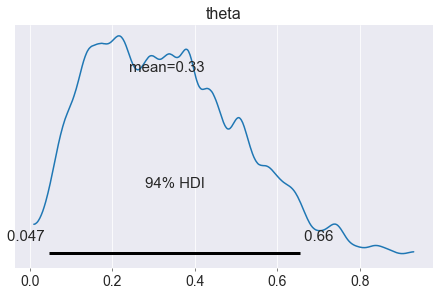

In [16]:
# 事後分布の要約
# HDI: Highest Density Interval, HPD: Highest Probability Density 
pm.plot_posterior(chain)

/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<AxesSubplot:title={'center':'theta'}>

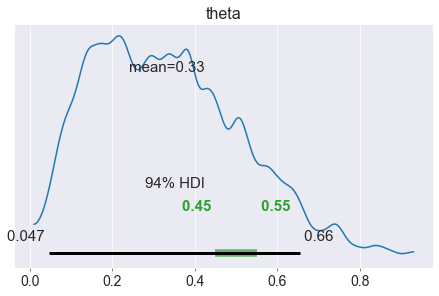

In [17]:
pm.plot_posterior(chain, rope=[0.45, 0.55])